In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel("credit card customer data.xlsx")
df.head(10)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   
5      6         58634             20000                   3   
6      7         48370            100000                   5   
7      8         37376             15000                   3   
8      9         82490              5000                   2   
9     10         44770              3000                   4   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  
5                  0                    1                 8  
6                  0                   11                 2  
7                  0                    1                 1  
8                  0                    2                 2  
9                  0                    1                 7

In [5]:
df.shape

(660, 7)

In [6]:
df.size

4620

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

In [9]:
#null values
df.isnull().any().any()

False

In [10]:
#Data Types
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [11]:
#Range
df.max() - df.min()

Sl_No                     659
Customer Key            88578
Avg_Credit_Limit       197000
Total_Credit_Cards          9
Total_visits_bank           5
Total_visits_online        15
Total_calls_made           10
dtype: int64

In [12]:
#IQR
df.quantile(0.75) - df.quantile(0.25)

Sl_No                    329.50
Customer Key           43377.25
Avg_Credit_Limit       38000.00
Total_Credit_Cards         3.00
Total_visits_bank          3.00
Total_visits_online        3.00
Total_calls_made           4.00
dtype: float64

In [13]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [14]:
df.describe(include = 'all').T

count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%       75%       max  
Sl_No                  330.5    495.25     660.0  
Customer Key         53874.5  77202.50   99843.0  
Avg_Credit_Limit     18000.0  48000.00  200000.0  
Total_Credit_Cards       5.0      6.00      10.0  
Total_visits_bank        2.0      4.00       5.0  
Total_visits_online      2.0      4.00      15.0  
Total_calls_made         3.0      5.00      10.0

In [15]:
df.skew()

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [16]:
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [17]:
#Checking duplicate values of Customer Key
df1 = df[df['Customer Key'].duplicated(False)].sort_values(by='Customer Key')
df1
df1.shape

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
48      49         37252              6000                   4   
432    433         37252             59000                   6   
4        5         47437            100000                   6   
332    333         47437             17000                   7   
411    412         50706             44000                   4   
541    542         50706             60000                   7   
391    392         96929             13000                   4   
398    399         96929             67000                   6   
104    105         97935             17000                   2   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
48                   0                    2                 8  
432                  2                    1                 2  
4                    0                   12                 3  
332                  3                    1                 0  
411                  5                    0                 2  
541                  5                    2                 2  
391                  5                    0                 0  
398                  2                    2                 2  
104                  1                    2                10  
632                  1                    7                 0

(10, 7)

In [18]:
#Removing duplicate Customer Key pairs and keeping only unique Customer Keys
df = df[~df['Customer Key'].duplicated(False)]
df.head()
df.shape

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
5      6         58634             20000                   3   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
5                  0                    1                 8

(650, 7)

In [19]:
#Dropping Sl_No and Customer Key
df = df.drop(['Sl_No', 'Customer Key'], axis=1)

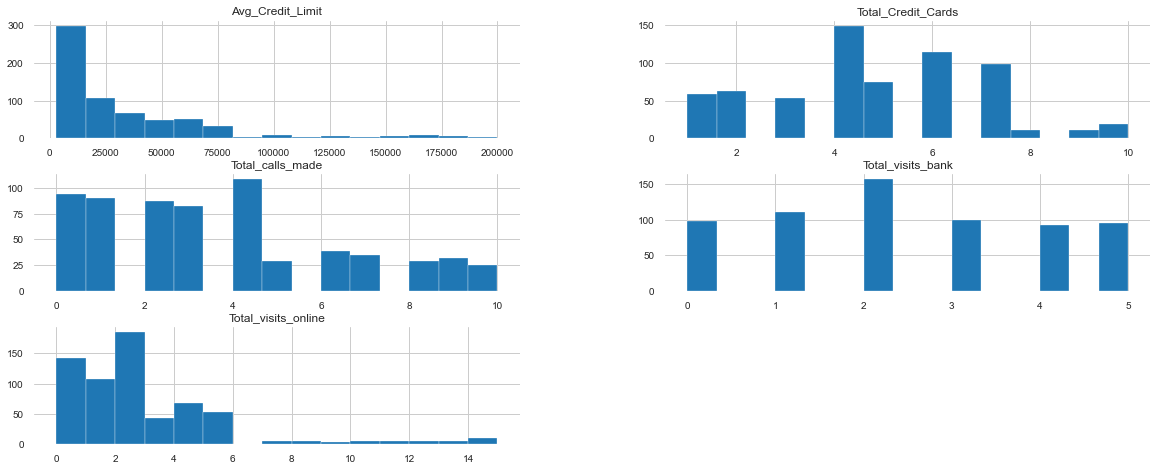

In [20]:
#Histograms
columns = list(df)
df[columns].hist(stacked=True, bins=15, figsize=(20,50), layout=(18,2)); 

In [21]:
#Correlation
df.corr()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Avg_Credit_Limit             1.000000            0.611033          -0.096115   
Total_Credit_Cards           0.611033            1.000000           0.319887   
Total_visits_bank           -0.096115            0.319887           1.000000   
Total_visits_online          0.549107            0.165633          -0.550585   
Total_calls_made            -0.413937           -0.650756          -0.506145   

                     Total_visits_online  Total_calls_made  
Avg_Credit_Limit                0.549107         -0.413937  
Total_Credit_Cards              0.165633         -0.650756  
Total_visits_bank              -0.550585         -0.506145  
Total_visits_online             1.000000          0.130844  
Total_calls_made                0.130844          1.000000

In [22]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

<Figure size 720x360 with 0 Axes>

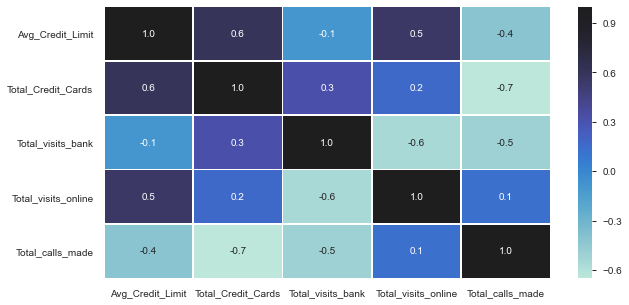

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

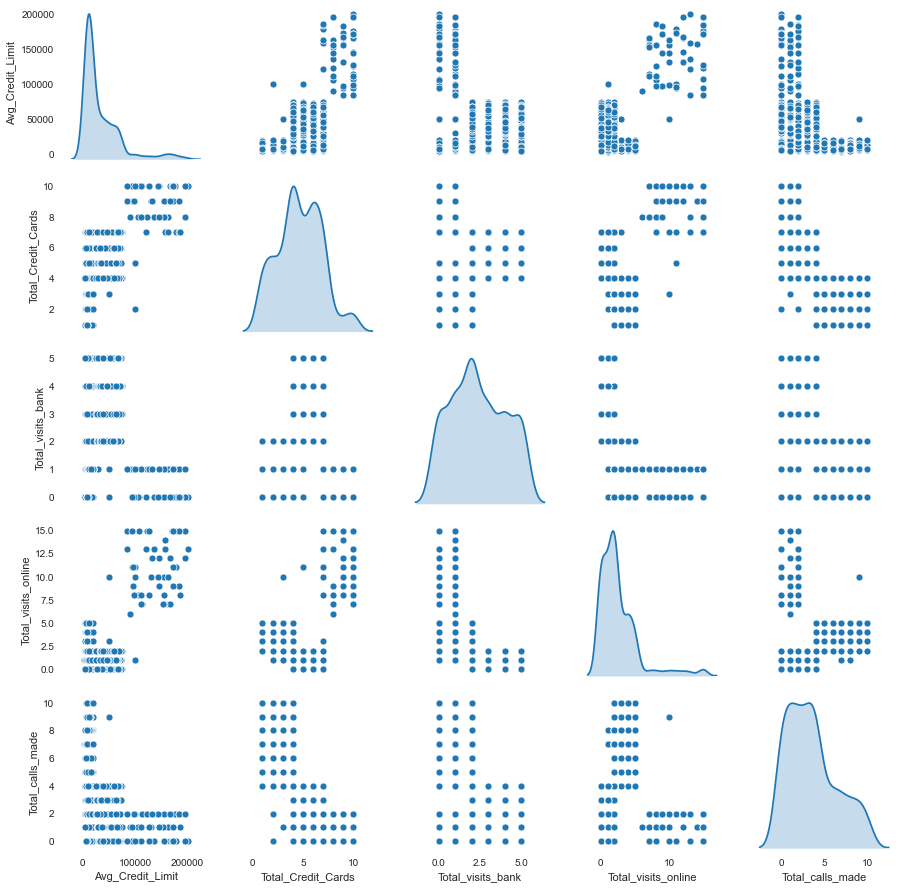

In [24]:
#Pairplots
import seaborn as sns
sns.pairplot(df,diag_kind='kde' )
plt.show()

In [25]:
#Box-plots

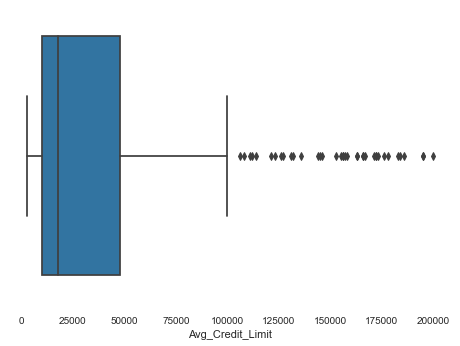

In [26]:
sns.boxplot(df['Avg_Credit_Limit'])

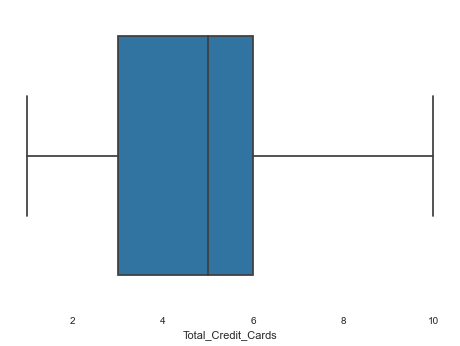

In [27]:
sns.boxplot(df['Total_Credit_Cards'])

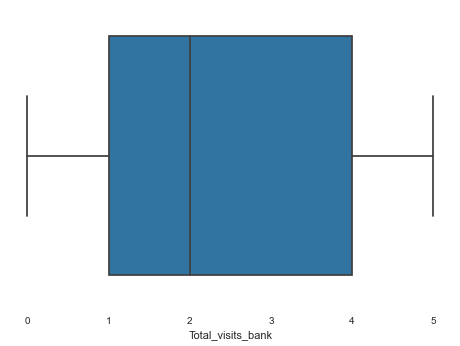

In [28]:
sns.boxplot(df['Total_visits_bank'])

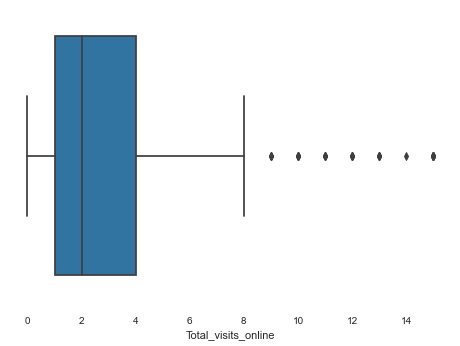

In [29]:
sns.boxplot(df['Total_visits_online'])

In [30]:
df1 = df[df['Total_visits_online'] > 8]
df1.shape
df1.mean()
#Since the 36 customers who fall into outlier range of 'Total Visits Online' column are generally those who have high 
#credit card limit and have around 9 credit cards hence high online visits seems normal. Hence we shall not remove or 
# treat these outliers. Additionally they hardly call or make any visits to the bank.

(36, 5)

Avg_Credit_Limit       141055.555556
Total_Credit_Cards          8.750000
Total_visits_bank           0.583333
Total_visits_online        12.222222
Total_calls_made            1.333333
dtype: float64

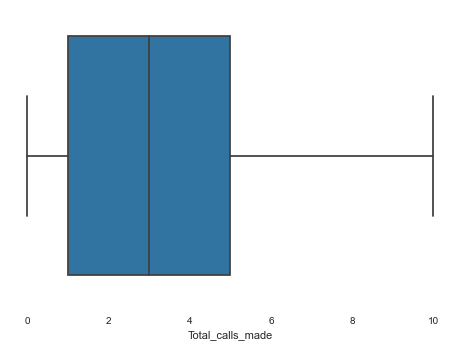

In [31]:
sns.boxplot(df['Total_calls_made'])

In [32]:
dflg = df.copy()

In [33]:
#Converting Avg_Credit_Limit to log values
dflg["Avg_Credit_Limit"] = dflg["Avg_Credit_Limit"].map(lambda i: np.log(i) if i > 0 else 0) 
print(dflg['Avg_Credit_Limit'].skew())

0.4014197674823806


In [34]:
dflg.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         11.512925                   2                  1   
1         10.819778                   3                  0   
2         10.819778                   7                  1   
3         10.308953                   5                  1   
5          9.903488                   3                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
5                    1                 8

Conclusions:

The dataset contains 660 records & 7 variables.
The Sl No is unique and does not add any value hence we can delete the column.
The customer key is unique however there are 10 duplicate records. (5 sets). We have deleted these rows since we do not know which one of these represent correct information for the particular customer.
The average credit limit for the customers is 34229. Since the scale of avg credit limit is way higher than other variables we have taken log transformation to smoothen out the density curve and reduce skewness. The outliers have also been treated through this. 

The average no. of credit cards held by a customer are 4.7.
The average bank visits a customer does are 2.4.
The average online visits a customer does are 2.6. We haven't treated the outliers here as the outliers pertain to a particular set of customers.
The average phone calls a customer does are 3.6

Looking at the density plots for each variable we get an idea that ideal clusters would be 3 or 4. 
Avg Credit Limit - 3 clusters
Average no. of credit cards - 4 clusters
Average bank visits - 4 clusters
Average online visits - 3 clusters
Average phone calls - 3 clusters

None of the variables are correlated to each other.

3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [35]:
from scipy.stats import zscore

In [36]:
dfzs = dflg.apply(zscore)
dfzs.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.644955           -1.241502          -0.862932   
1          0.897145           -0.781162          -1.477961   
2          0.897145            1.060199          -0.862932   
3          0.346034            0.139519          -0.862932   
5         -0.091407           -0.781162          -1.477961   

   Total_visits_online  Total_calls_made  
0            -0.547996         -1.258480  
1             2.531519          1.893108  
2             0.136341          0.142226  
3            -0.547996          0.142226  
5            -0.547996          1.542931

<Figure size 1440x720 with 0 Axes>

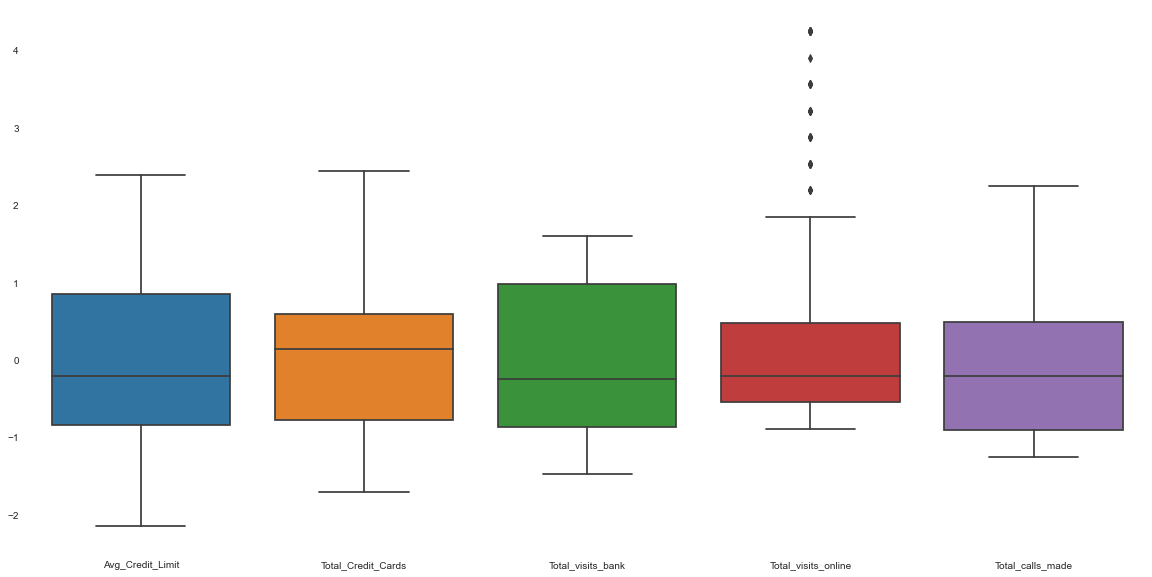

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(data=dfzs)

KMeans(n_clusters=1, random_state=20)

KMeans(n_clusters=2, random_state=20)

KMeans(n_clusters=3, random_state=20)

KMeans(n_clusters=4, random_state=20)

KMeans(n_clusters=5, random_state=20)

KMeans(n_clusters=6, random_state=20)

KMeans(n_clusters=7, random_state=20)

KMeans(random_state=20)

KMeans(n_clusters=9, random_state=20)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Average distortion')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

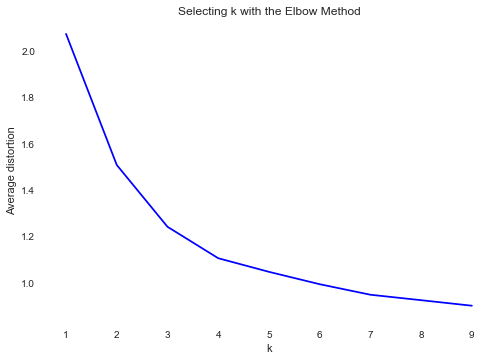

In [38]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state = 20)
    model.fit(dfzs)
    prediction=model.predict(dfzs)
    meanDistortions.append(sum(np.min(cdist(dfzs, model.cluster_centers_, 'euclidean'), axis=1)) / dfzs.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [39]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(dfzs)
prediction=final_model.predict(dfzs)

#Append the prediction 
df["GROUP"] = prediction
dfzs["GROUP"] = prediction
print("Groups Assigned : \n")
df.head(10)

KMeans(n_clusters=4)

Groups Assigned : 



Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             100000                   2                  1   
1              50000                   3                  0   
2              50000                   7                  1   
3              30000                   5                  1   
5              20000                   3                  0   
6             100000                   5                  0   
7              15000                   3                  0   
8               5000                   2                  0   
9               3000                   4                  0   
10             10000                   4                  0   

    Total_visits_online  Total_calls_made  GROUP  
0                     1                 0      1  
1                    10                 9      0  
2                     3                 4      1  
3                     1                 4      1  
5                     1                 8      0  
6                    11                 2      3  
7                     1                 1      0  
8                     2                 2      0  
9                     1                 7      0  
10                    5                 5      0

In [40]:
dfclust4 = df.groupby(['GROUP'])
dfclust4.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0          12203.619910            2.398190           0.932127   
1          50051.162791            5.544186           3.400000   
2          12204.819277            5.463855           3.590361   
3         140937.500000            8.833333           0.604167   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 3.574661          6.864253  
1                 0.962791          2.055814  
2                 1.012048          1.963855  
3                10.958333          1.062500

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5fdc2bfd0>,
      dtype=object)

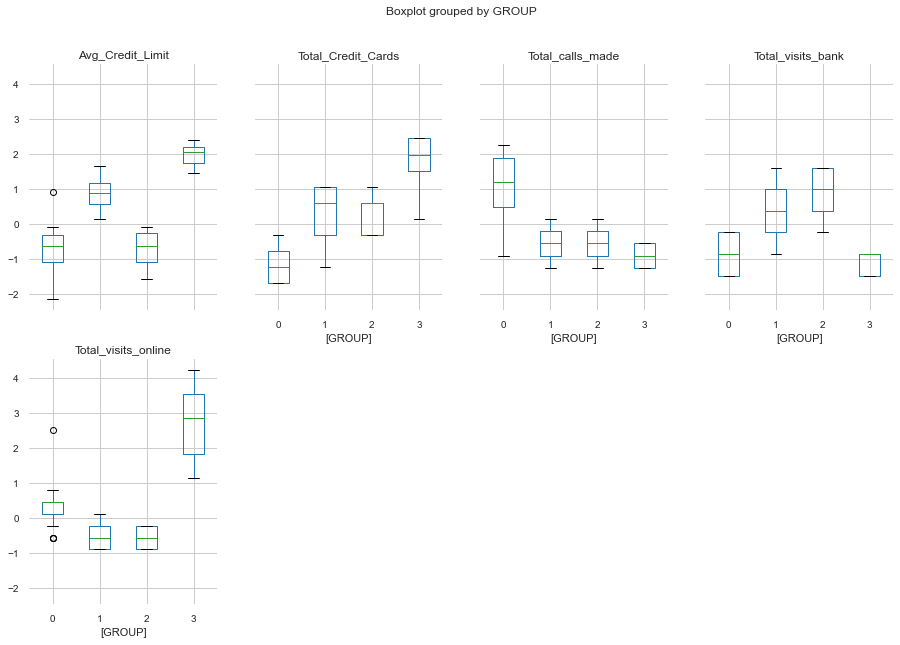

In [41]:
dfzs.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [42]:
df['GROUP'].value_counts()  

0    221
1    215
2    166
3     48
Name: GROUP, dtype: int64

In [43]:
# K = 4 (3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

KMeans(n_clusters=4, random_state=21)

[]

[]

[]

Text(0.5, 0, 'Length')

Text(0.5, 0, 'Height')

Text(0.5, 0, 'Weight')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

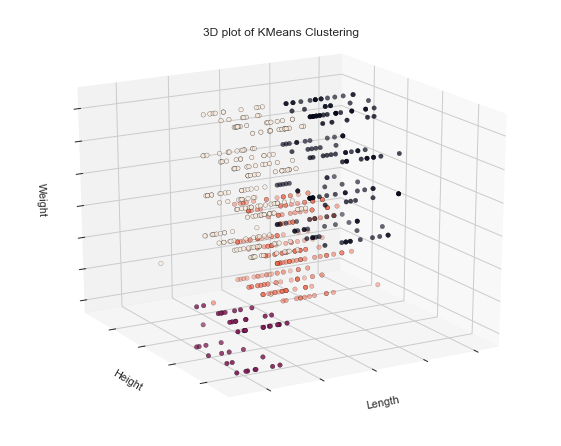

In [44]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k4_model=KMeans(4, random_state=21)
k4_model.fit(dfzs)
labels = k4_model.labels_
ax.scatter(dfzs.iloc[:, 0], dfzs.iloc[:, 1], dfzs.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [45]:
# Let us now do for K = 3
final_model=KMeans(3, random_state=23)
final_model.fit(dfzs)
prediction=final_model.predict(dfzs)

#Append the prediction 
df["GROUP"] = prediction
dfzs["GROUP"] = prediction
print("Groups Assigned : \n")
df.head(10)

KMeans(n_clusters=3, random_state=23)

Groups Assigned : 



Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             100000                   2                  1   
1              50000                   3                  0   
2              50000                   7                  1   
3              30000                   5                  1   
5              20000                   3                  0   
6             100000                   5                  0   
7              15000                   3                  0   
8               5000                   2                  0   
9               3000                   4                  0   
10             10000                   4                  0   

    Total_visits_online  Total_calls_made  GROUP  
0                     1                 0      0  
1                    10                 9      1  
2                     3                 4      0  
3                     1                 4      0  
5                     1                 8      1  
6                    11                 2      2  
7                     1                 1      1  
8                     2                 2      1  
9                     1                 7      1  
10                    5                 5      1

In [46]:
dfclust3 = df.groupby(['GROUP'])
dfclust3.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0           33561.67979            5.509186           3.482940   
1           12203.61991            2.398190           0.932127   
2          140937.50000            8.833333           0.604167   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 0.984252          2.015748  
1                 3.574661          6.864253  
2                10.958333          1.062500

In [47]:
Kmeans3 = df['GROUP'].value_counts() 
Kmeans3

0    381
1    221
2     48
Name: GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5faeda810>,
      dtype=object)

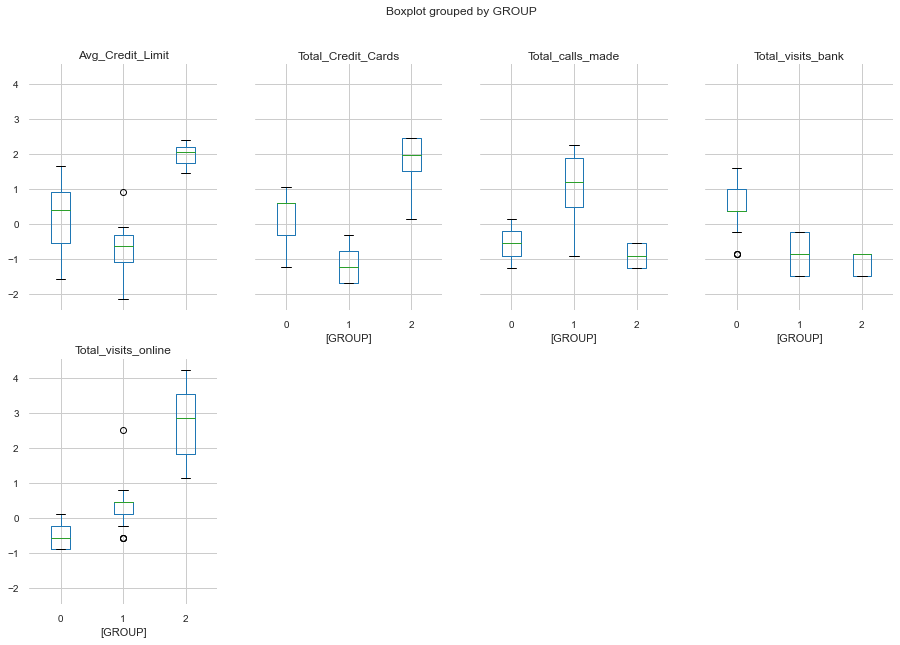

In [48]:
dfzs.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

KMeans(n_clusters=3, random_state=24)

[]

[]

[]

Text(0.5, 0, 'Length')

Text(0.5, 0, 'Height')

Text(0.5, 0, 'Weight')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

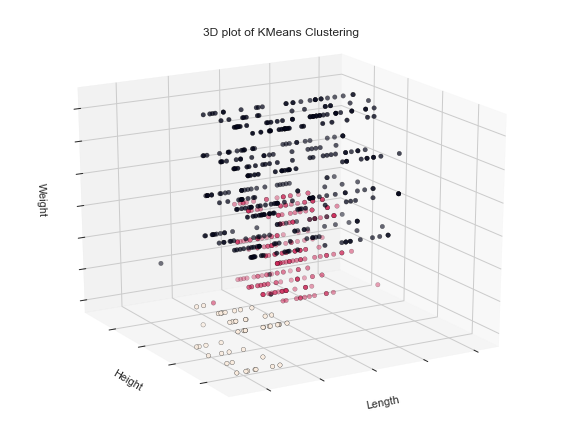

In [49]:
## K=3, 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3, random_state=24)
k3_model.fit(dfzs)
labels = k3_model.labels_
ax.scatter(dfzs.iloc[:, 0], dfzs.iloc[:, 1], dfzs.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

### From the boxplots & 3D plots above we see that k=3 gives distinct clusters hence we shall go with 3 clusters to classify data. With k=4 there is some overlap between clusters.

4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

### Using Scipy.Cluster

In [50]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [51]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfzs, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(dfzs))

c

0.8415094528887299

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 2.1066893030275904, 2.1066893030275904, 0.0],
  [0.0, 2.583643326671676, 2.583643326671676, 2.1066893030275904]],
 'ivl': ['(48)', '1', '(601)'],
 'leaves': [1293, 1, 1296],
 'color_list': ['b', 'b']}

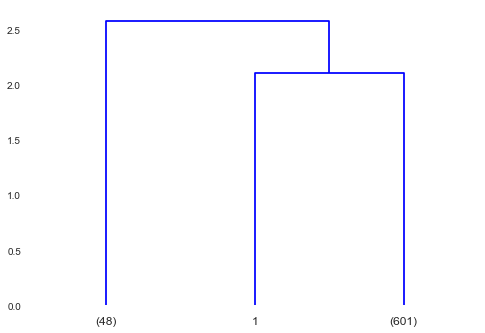

In [53]:
#Using truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [54]:
Z = linkage(dfzs, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfzs))

c

0.7745444925966392

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 45.729319394686456, 45.729319394686456, 0.0],
  [0.0, 52.66149159782512, 52.66149159782512, 45.729319394686456]],
 'ivl': ['(221)', '(48)', '(381)'],
 'leaves': [1295, 1292, 1296],
 'color_list': ['b', 'b']}

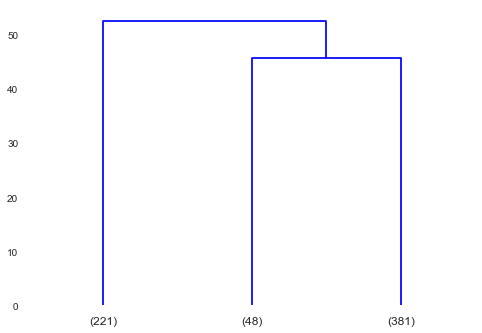

In [55]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [56]:
Z = linkage(dfzs, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfzs))

c

0.8620142907627905

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 6.33521551427937, 6.33521551427937, 0.0],
  [0.0, 7.97583335331152, 7.97583335331152, 6.33521551427937]],
 'ivl': ['(48)', '(221)', '(381)'],
 'leaves': [1292, 1295, 1296],
 'color_list': ['b', 'b']}

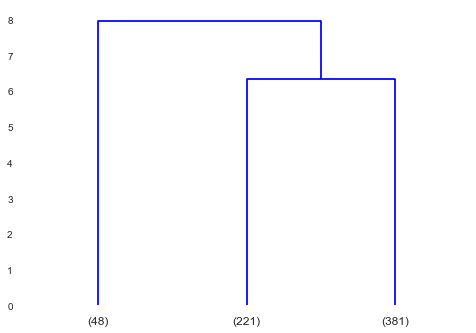

In [57]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [58]:
Z = linkage(dfzs, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(dfzs))

c

0.8948050952535161

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 3.157202712190971, 3.157202712190971, 0.0],
  [0.0, 4.832105733243524, 4.832105733243524, 3.157202712190971]],
 'ivl': ['(48)', '(381)', '(221)'],
 'leaves': [1292, 1295, 1296],
 'color_list': ['g', 'b']}

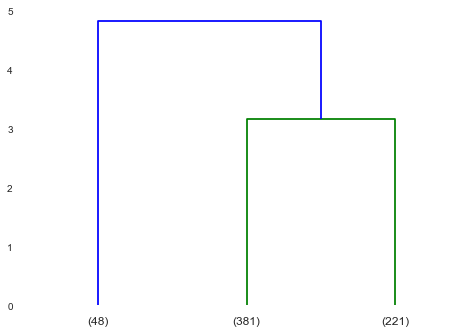

In [59]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [60]:
Z = linkage(dfzs, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfzs))

c

0.897320193690298

In [61]:
#plt.figure(figsize=(25, 10))
#dendrogram(Z)
#plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 3.0917266280656643, 3.0917266280656643, 0.0],
  [0.0, 3.559797414509545, 3.559797414509545, 3.0917266280656643],
  [0.0, 5.30214523015939, 5.30214523015939, 3.559797414509545]],
 'ivl': ['(48)', '(382)', '1', '(219)'],
 'leaves': [1293, 1295, 1, 1292],
 'color_list': ['g', 'g', 'b']}

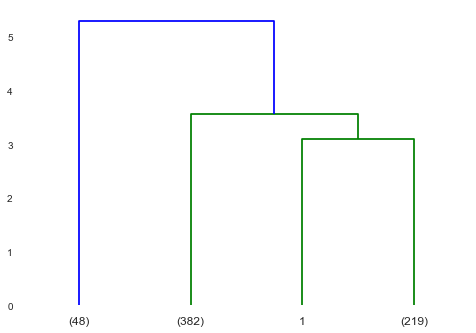

In [62]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 3.559797414509545, 3.559797414509545, 0.0],
  [0.0, 5.30214523015939, 5.30214523015939, 3.559797414509545]],
 'ivl': ['(48)', '(382)', '(220)'],
 'leaves': [1293, 1295, 1296],
 'color_list': ['g', 'b']}

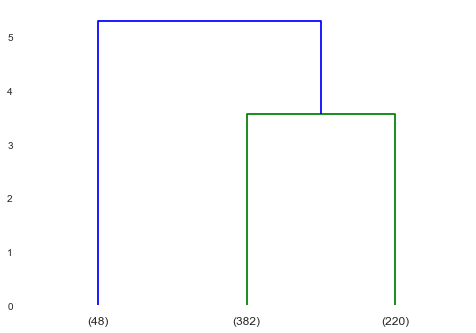

In [63]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [64]:
max_d = 3.5

In [65]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<Figure size 1296x1152 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [30.0, 30.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [110.0, 110.0, 150.0, 150.0],
  [50.0, 50.0, 130.0, 130.0],
  [5.0, 5.0, 90.0, 90.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [190.0, 190.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [210.0, 210.0, 260.0, 260.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [285.0, 285.0, 310.0, 310.0],
  [275.0, 275.0, 297.5, 297.5],
  [235.0, 235.0, 286.25, 286.25],
  [47.5, 47.5, 260.625, 260.625]],

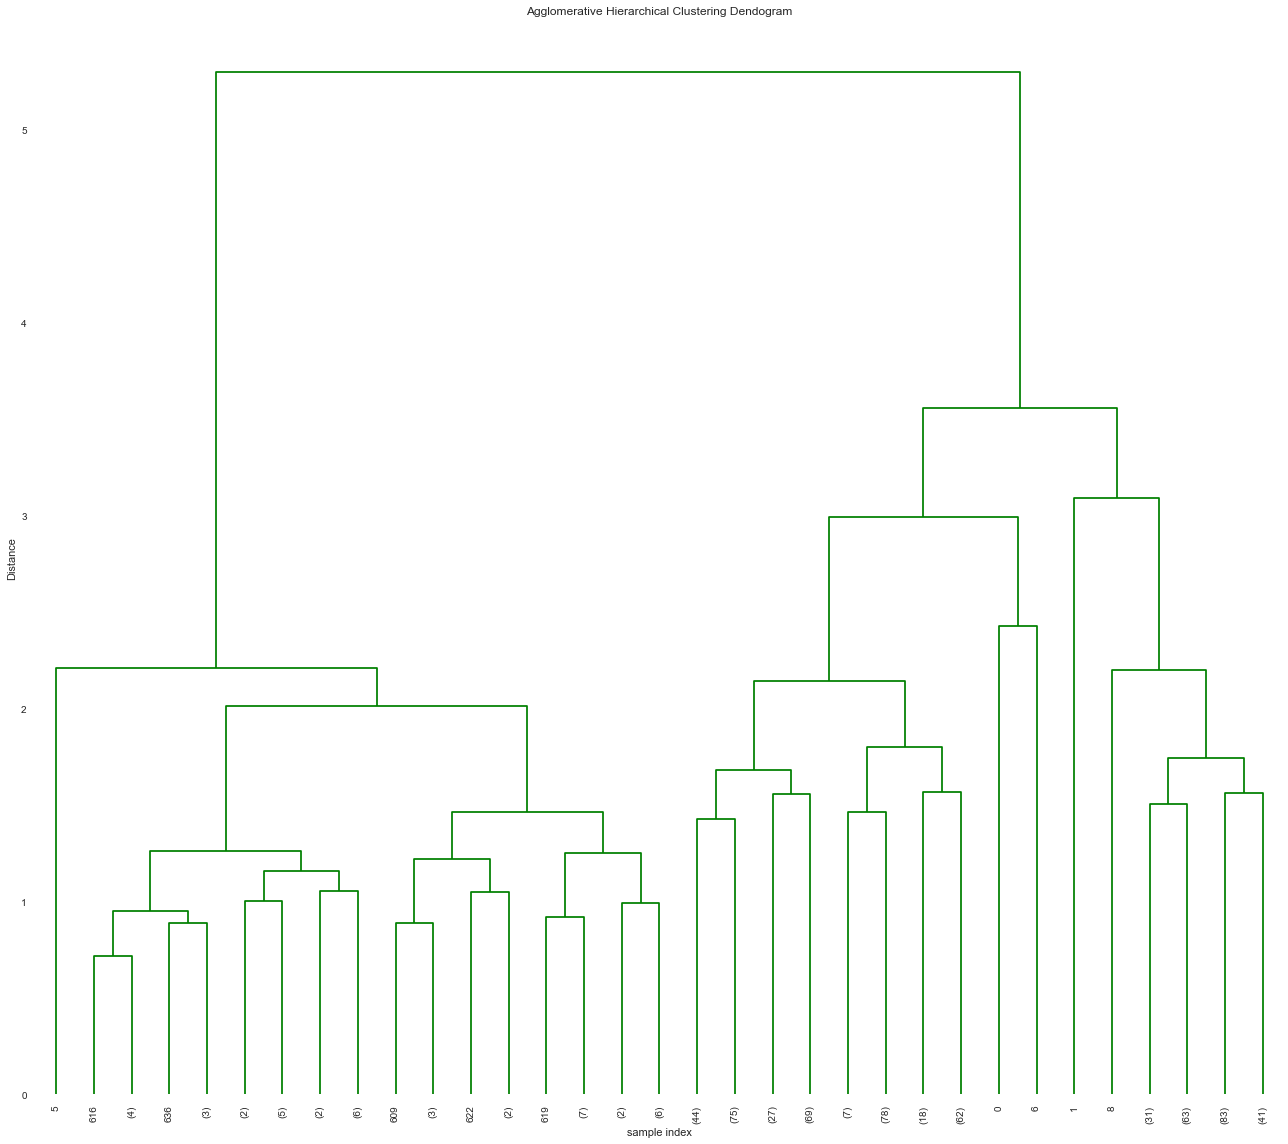

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(dfzs, 'average')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### From the above we see that k=3 gives better clustering than k=4. There is only 1 record in additional 4th cluster. Cophenetic Coefficeint = 0.897 is best for 'average' linkage. The closer the coefficient to 1 the better the clustering.

### Using sklearn.cluster

In [67]:
from sklearn.cluster import AgglomerativeClustering 

In [68]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [69]:
model.fit(dfzs)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [70]:
df['GROUP'] = model.labels_
dfzs["GROUP"] = model.labels_
df.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             100000                   2                  1   
1              50000                   3                  0   
2              50000                   7                  1   
3              30000                   5                  1   
5              20000                   3                  0   
6             100000                   5                  0   
7              15000                   3                  0   
8               5000                   2                  0   
9               3000                   4                  0   
10             10000                   4                  0   

    Total_visits_online  Total_calls_made  GROUP  
0                     1                 0      0  
1                    10                 9      3  
2                     3                 4      0  
3                     1                 4      0  
5                     1                 8      2  
6                    11                 2      1  
7                     1                 1      0  
8                     2                 2      2  
9                     1                 7      2  
10                    5                 5      2

In [71]:
dfClust4_Hier = df.groupby(['GROUP'])

In [72]:
dfClust4_Hier.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0          33513.089005            5.502618           3.473822   
1         140937.500000            8.833333           0.604167   
2          12018.264840            2.392694           0.940639   
3          50000.000000            3.000000           0.000000   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 0.984293          2.013089  
1                10.958333          1.062500  
2                 3.557078          6.881279  
3                10.000000          9.000000

In [73]:
Hier4 = dfzs["GROUP"].value_counts()
Hier4

0    382
2    219
1     48
3      1
Name: GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe61757b2d0>,
      dtype=object)

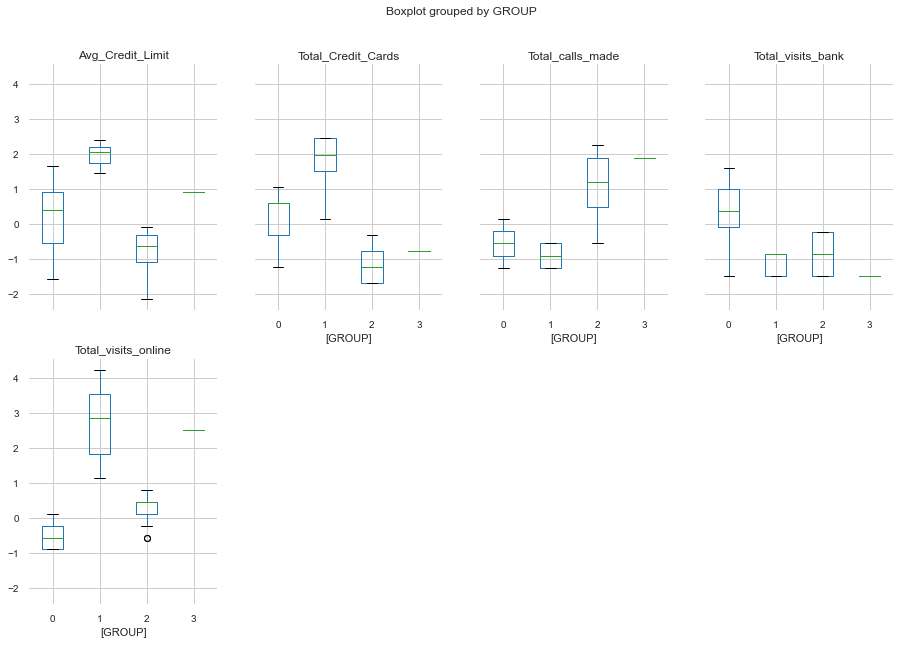

In [74]:
dfzs.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [75]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [76]:
model.fit(dfzs)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [77]:
df['GROUP'] = model.labels_
dfzs["GROUP"] = model.labels_
df.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             100000                   2                  1   
1              50000                   3                  0   
2              50000                   7                  1   
3              30000                   5                  1   
5              20000                   3                  0   
6             100000                   5                  0   
7              15000                   3                  0   
8               5000                   2                  0   
9               3000                   4                  0   
10             10000                   4                  0   

    Total_visits_online  Total_calls_made  GROUP  
0                     1                 0      2  
1                    10                 9      0  
2                     3                 4      2  
3                     1                 4      2  
5                     1                 8      0  
6                    11                 2      1  
7                     1                 1      2  
8                     2                 2      0  
9                     1                 7      0  
10                    5                 5      0

In [78]:
dfClust3_Hier = df.groupby(['GROUP'])

In [79]:
dfClust3_Hier.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0          12190.909091            2.395455           0.936364   
1         140937.500000            8.833333           0.604167   
2          33513.089005            5.502618           3.473822   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 3.586364          6.890909  
1                10.958333          1.062500  
2                 0.984293          2.013089

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe616d39810>,
      dtype=object)

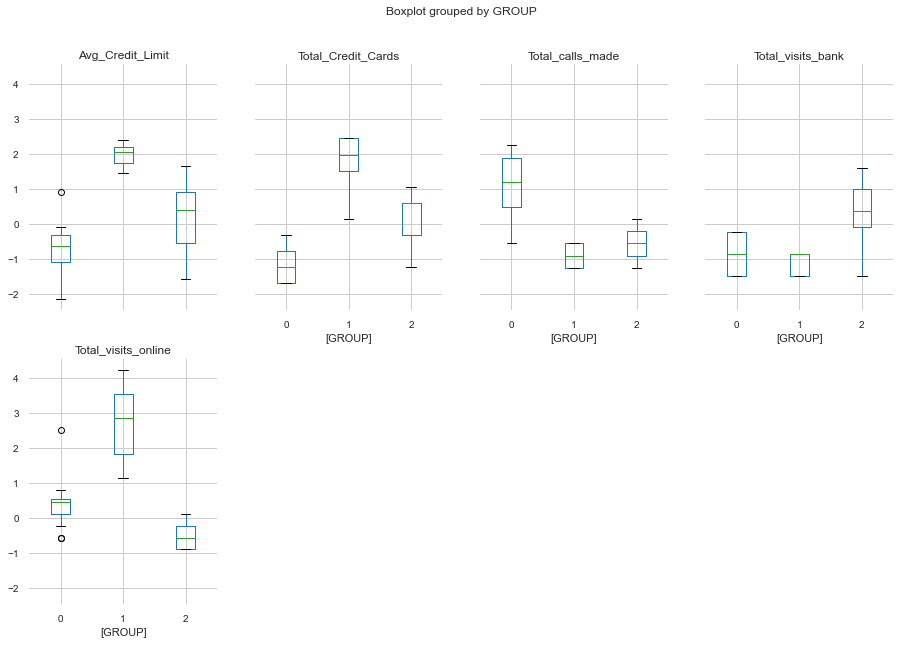

In [80]:
dfzs.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [81]:
Hier3 = dfzs["GROUP"].value_counts()
Hier3

2    382
0    220
1     48
Name: GROUP, dtype: int64

k=3 gives better clustering. With k=4 there is only 1 datapoint in 4th cluster. 

Hence from both the above packages we choose k=3 since it gives 3 distinct clusters.

### Clusters Visualization using scatter plots

In [82]:
#create input variables
X=dfzs.loc[:,:].values

In [83]:
#import libraries to plot dendrogram
import scipy.cluster.hierarchy as sch

<Figure size 1080x720 with 0 Axes>

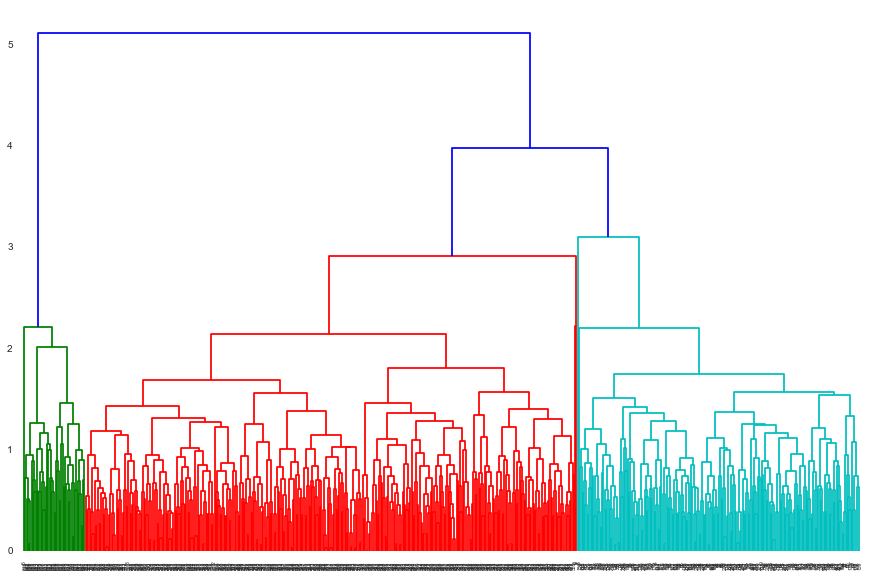

In [84]:
#plot dedrogram to visualise the possbile number of clusters
plt.figure(figsize=(15, 10))
dendrogram=sch.dendrogram(sch.linkage(X,method='average'))

In [85]:
## Training entire data using Heirarchical Clustering
from sklearn.cluster import AgglomerativeClustering 

In [86]:
hc=AgglomerativeClustering(n_clusters=3)

In [87]:
clusters=hc.fit(X)

In [88]:
clusters.labels_

array([0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

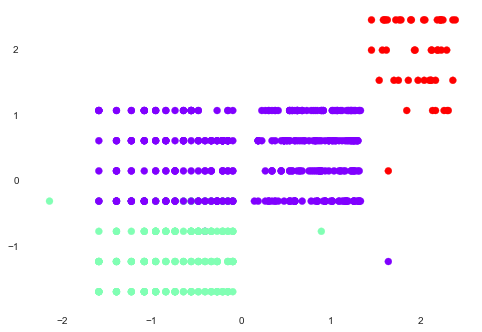

In [89]:
#visualize the clusters  with labels
plt.scatter(X[:,0],X[:,1], c=clusters.labels_, cmap='rainbow')  
plt.show()

5. Calculate average silhouette score for both methods.(5marks)

### Kmeans

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
#Kmeans Clustering
silhouette_score(dfzs,prediction)

0.5638936282781352

### Hierarchical

In [92]:
max_d = 3.5

In [93]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [94]:
#Hierarchical Clustering
from sklearn.metrics import silhouette_score
silhouette_score(dfzs,clusters)

0.5648955864838658

### Here we see that Silhouette score is similar for both clustering techniques. With Hierarchical clustering it's slightly better (0.5649) than Kmeans (0.5639). Closer the coefficient to 1 the better is the clustering.

6. Compare K-means clusters with Hierarchical clusters. (5 marks)

### Kmeans

In [95]:
Kmeans3

0    381
1    221
2     48
Name: GROUP, dtype: int64

In [96]:
dfclust3.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0           33561.67979            5.509186           3.482940   
1           12203.61991            2.398190           0.932127   
2          140937.50000            8.833333           0.604167   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 0.984252          2.015748  
1                 3.574661          6.864253  
2                10.958333          1.062500

### Hierarchical

In [97]:
Hier3

2    382
0    220
1     48
Name: GROUP, dtype: int64

In [98]:
dfClust3_Hier.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0          12190.909091            2.395455           0.936364   
1         140937.500000            8.833333           0.604167   
2          33513.089005            5.502618           3.473822   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 3.586364          6.890909  
1                10.958333          1.062500  
2                 0.984293          2.013089

### Comparing the above we see that both the methods provide almost similar clusters:
    1. Hierachical clustering is slightly better than Kmeans by looking at silhouette scores.
    2. Both the methods have grouped data into clusters with similar number of records. 
          Cluster 1: 381 or 382, Cluster 2: 220 or 221, Cluster 3: 48
    3. The mean values for all 5 variables with both the clustering techiques are in similar ranges.

7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

A. How many different segments of customers are there?
B. How are these segments different from each other?
C. What are your recommendations to the bank on how to better market to and service these customers?

### There are 3 distinct clusters identified in the dataset. There are 5 variables present in the dataset based on which we will segment customers into 3 clusters & target them as below:

Assumption: Avg Credit credit is being fully utilized by the customer as granted by the bank. 

Cluster 1: 
Cluster with around 220 customers: Avg Credit Limit is 12000-12500, hold 2 credit cards and majorly interact with banks through calls (6-7 times).

To service these customers there should be dedicated 24x7 call centers, Toll free number and Interactive Voice Response facility. However there will be a cost of setting call centers involved.

Marketing Strategy: Call center staff should be well versed and interact with the existing customers for calls made or received/ and must convey the various offerings going on. They must be handy with any frequently asked questions on credit cards and well versed. Encourage the customers to avail various concessions offers made by the credit cards department.

Based on their credit limit & ownership of cards they can be targeted with cash back options, discounts on rides, 
promotions, rewards, loyalty points, lounge access, food discounts etc.


Cluster 2:
Cluster with around 382 customers: Average Credit Limit is 33500-44000, hold 5-6 credit cards & prefer visiting the bank (3-4 times) for any issues. 

To service these customers bank needs to set up walk in credit card support desk locations. This involves high cost, time and energy.

Marketing Strategy: Leaflets, Campaigns, Notes, Handouts, Adverstising material, reward offerings & tie ups , POPs must be made available at the bank and help desk representatives should inform face to face to these customers who prefer visiting bank about the offerings to encourage them to spend more on existing credit cards and to sell to new customers.

Based on their credit limit & ownership of cards they can be targeted to sell family cards & bundle offers, supplementary cards, cards with low interest rates, collaboration with different stores to earn points. Additionally Accumulated points can be used for upgradation on various platforms.


Cluster 3:
Cluster with around 48 customers: Avg Credit Limit is approx. 140000, hold 8 credit cards & make very high online visits (~10).

The customer care should be done through web-based platforms, sns platforms, chat box, sms and emails, apps, most frequently asked questions should be put up on the website. The cost of operation is low for these customers.

We should target to convert cluster 2 customers to 1 to reduce bank footfall and cluster 2 customers should be converted to cluster 3 to reduce cost of call operations going forward.

Marketing Strategy: All promotional material, leaflets, new launches, campaigns, reward programs, Tie-ups must be conveyed through emails, web platforms, app, sms whatsapp to their registered mobile phones as they prefer online visits. Chat box or help support should be made available to instantly support their queries regarding the offerings to encourage them to spend more.

Since cluster 3 cutsomers have high limits they can be provided with hotel and travel discounts, discounts on online purchases, free entertainment offers on a minimum spend on the card. Additionally the can be given exclusive membership cards since they own multiple cards they might be interested in such variety offerings.

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992